# Connect Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Installations

In [2]:
!pip install pyvi
!pip install torch
!pip install gensim
!pip install underthesea
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 28.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
   

# Fix bug

After executing this cell, you must Restart runtim (Runtime → Restart runtime)

In [3]:
import subprocess
import sys

# !pip install numpy==1.26.4
def check_and_install_numpy(required_ver="1.26.4"):
  current_ver = np.__version__

  if current_ver != required_ver:
    print(f"Installing numpy=={required_ver}...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", f"numpy=={required_ver}"])
    print("Numpy has been updated. Please restart your runtime for changes to take effect.")
  else:
    print("Numpy version is already correct.")

check_and_install_numpy()

Installing numpy==1.26.4...
Numpy has been updated. Please restart your runtime for changes to take effect.


In [1]:
import numpy as np
print(np.__version__)

1.26.4


# Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from underthesea import word_tokenize

from pyvi import ViTokenizer, ViPosTagger

import gensim
from gensim.utils import simple_preprocess
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Embedding

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, accuracy_score

import torch

import joblib

from transformers import AutoTokenizer, AutoModel

# Dataset paths

In [44]:
train_path = '/content/drive/MyDrive/Dataset/NLP/train.csv'
test_path = '/content/drive/MyDrive/Dataset/NLP/test.csv'
stopwords_path = '/content/drive/MyDrive/Dataset/NLP/stopwords-vi.txt'

# Preprocess dataset

In [82]:
def load_stopwords(file_path):
  with open(file_path, 'r', encoding='utf-8-sig') as f:
    return {line.strip() for line in f if line.strip()}

def preprocess(text, stopwords):
  tokenized_text = ViTokenizer.tokenize(text)
  tokens = simple_preprocess(tokenized_text)
  tokens = [token for token in tokens if token not in stopwords]
  return " ".join(tokens)

In [46]:
stopwords = load_stopwords(stopwords_path)

In [67]:
train_df = pd.read_csv(train_path)
train_df['text'] = train_df['text'].apply(lambda x: preprocess(x, stopwords))
train_df.to_csv('processed_train.csv')

In [68]:
test_df = pd.read_csv(test_path)
test_df['text'] = test_df['text'].apply(lambda x: preprocess(x, stopwords))
test_df.to_csv('processed_test.csv')

In [83]:
train_path = '/content/drive/MyDrive/Dataset/NLP/processed_train.csv'
test_path = '/content/drive/MyDrive/Dataset/NLP/processed_test.csv'

In [84]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

train_df.shape, test_df.shape

((33759, 3), (50373, 3))

In [85]:
train_df.head()

,Unnamed: 0,text,label
0,0,thành_lập dự_án policy phòng_chống hiv aids vn...,Chinh Tri Xa Hoi
1,1,khách vịnh nha_trang trực_ban bộ_đội biên_phòn...,Chinh Tri Xa Hoi
2,2,tphcm khai_trương dịch_vụ lặn biển săn cá_mập ...,Chinh Tri Xa Hoi
3,3,du_lịch vn tư_vấn nước_ngoài phạm tổng_cục du_...,Chinh Tri Xa Hoi
4,4,quy_chế tuyển_sinh làm_tròn điểm thi bộ_trưởng...,Chinh Tri Xa Hoi


In [89]:
X_train = train_df['text']
y_train = train_df['label']

X_test = test_df['text']
y_test = test_df['label']

['Chinh Tri Xa Hoi' 'Doi Song' 'Khoa hoc' 'Kinh doanh' 'Phap luat'
 'Suc khoe' 'The gioi' 'The thao' 'Van hoa' 'Vi tinh']


<Axes: xlabel='label'>

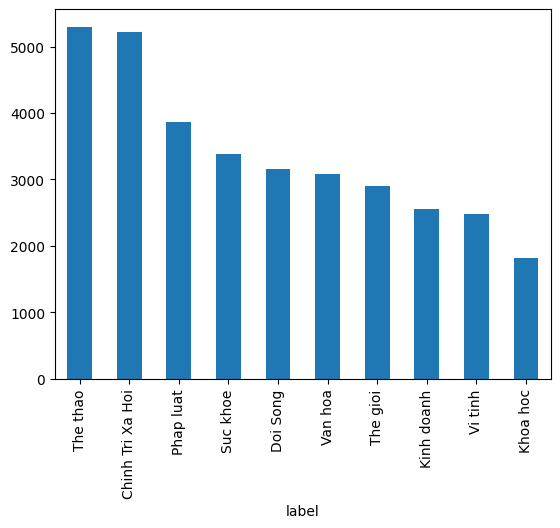

In [87]:
print(y_train.unique())
y_train.value_counts().plot(kind='bar')

['Chinh tri Xa hoi' 'Doi song' 'Khoa hoc' 'Kinh doanh' 'Phap luat'
 'Suc khoe' 'The gioi' 'The thao' 'Van hoa' 'Vi tinh']


<Axes: xlabel='label'>

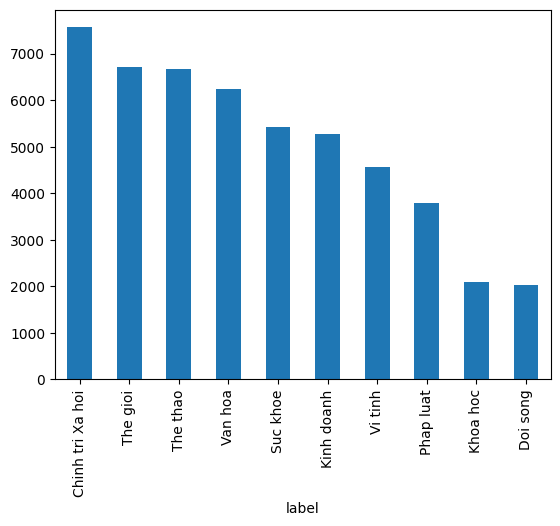

In [90]:
print(y_test.unique())
y_test.value_counts().plot(kind='bar')

In [91]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

y_train, y_test

(array([0, 0, 0, ..., 9, 9, 9]), array([0, 0, 0, ..., 9, 9, 9]))

In [92]:
le.classes_

array(['Chinh tri Xa hoi', 'Doi song', 'Khoa hoc', 'Kinh doanh',
       'Phap luat', 'Suc khoe', 'The gioi', 'The thao', 'Van hoa',
       'Vi tinh'], dtype=object)

# Bag of Words

In [113]:
def classification_pipeline(X_train, X_test, y_train, y_test):
  accuracies = {}
  classifiers = {
      "Logistic Regression": LogisticRegression(),
      "Naive Bayes": MultinomialNB(),
      "Decision Tree": DecisionTreeClassifier()
  }

  for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    accuracies[name] = acc

  return accuracies

def plot_accuracies(accuracies):
  models = list(accuracies.keys())
  acc_values = list(accuracies.values())

  plt.figure(figsize=(8, 6))
  bars = plt.bar(models, acc_values, width=0.4, color='skyblue', edgecolor='black')
  plt.xlabel('Models')
  plt.ylabel('Accuracy')
  plt.title('Model Accuracies')
  plt.ylim(0, 1)
  plt.grid(False)

  for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
      f"{bar.get_height():.4f}", ha='center', va='bottom')

  plt.show()

## Count Vectors as features

In [ ]:
# def sparse_to_dense(sparse):
#   try:
#     return sparse.toarray()
#   except MemoryError:
#     print("Not enough memory to convert from sparse matrix to dense matrix")
#     return None

In [108]:
count_vectorizer = CountVectorizer(max_features=5000)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

Logistic Regression Accuracy: 0.9046
Naive Bayes Accuracy: 0.8885
Decision Tree Accuracy: 0.7261


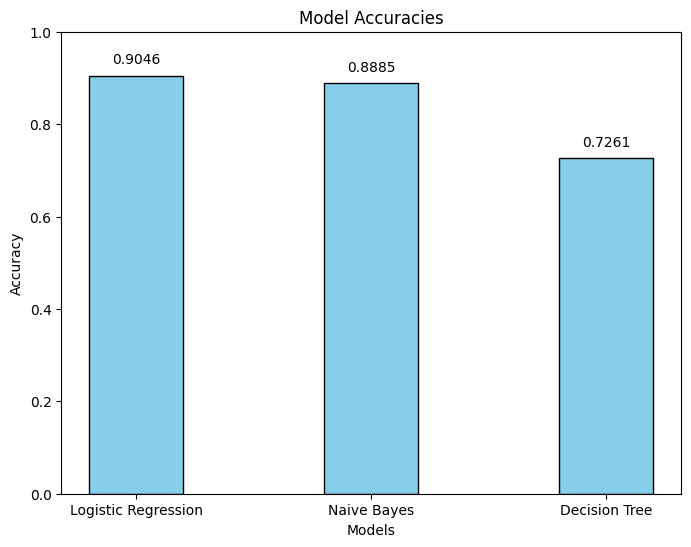

In [114]:
accuracies = classification_pipeline(X_train_count, X_test_count, y_train, y_test)
plot_accuracies(accuracies)

## TF-IDF Vectors as features

In [110]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [41]:
X_train_tfidf[0].toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.09802604,
        0.        ]])

Logistic Regression Accuracy: 0.9215
Naive Bayes Accuracy: 0.8902
Decision Tree Accuracy: 0.7205


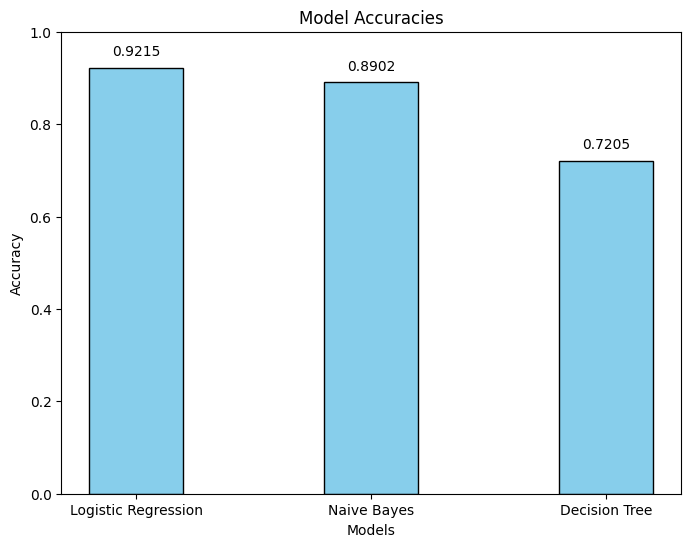

In [115]:
accuracies = classification_pipeline(X_train_tfidf, X_test_tfidf, y_train, y_test)
plot_accuracies(accuracies)

# Doc2Vec

## Using pretrain model : PhoBert

In [ ]:
# def get_pretrain_embedding(text, tokenizer, model):
#   inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
#   outputs = model(**inputs)
#   embedding = torch.mean(outputs.last_hidden_state, dim=1).detach().numpy()
#   return embedding[0]

# def get_pretrain_embeddings(texts, tokenizer, model):
#   embeddings = []
#   for text in texts:
#     emb = get_pretrain_embedding(text, tokenizer, model)
#     embeddings.append(emb)
#   return np.array(embeddings)

In [ ]:
pho_bert = "vinai/phobert-base"
pho_bert_tokenizer = AutoTokenizer.from_pretrained(pho_bert)
pho_bert_model = AutoModel.from_pretrained(pho_bert)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/543M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

## Non-pretrain

In [178]:
def train_doc2vec_model(texts, vector_size=300, window=5, min_count=2, epochs=10):
  documents = [TaggedDocument(words=doc.split(), tags=[str(i)]) for i, doc in enumerate(texts)]
  model = Doc2Vec(vector_size=vector_size, window=window, min_count=min_count, workers=4, epochs=1, compute_loss=True)
  model.build_vocab(documents)
  model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)

  for epoch in range(epochs):
    model.train(documents, total_examples=model.corpus_count, epochs= 1)
    print(f"Epoch {epoch+1} / {epochs}")
  model.save("doc2vec.model")
  return model

In [132]:
def get_doc2vec_embeddings(doc2vec_model, texts):
  embeddings = []
  for text in texts:
    emb = doc2vec_model.infer_vector(text.split())
    embeddings.append(emb)
  return np.array(embeddings)

In [159]:
def train_nn_model(X_train, y_train, X_test, y_test, epochs=30, embedding_dim=300):
  num_classes = len(np.unique(y_train))
  y_train_cat = to_categorical(y_train, num_classes=num_classes)
  y_test_cat = to_categorical(y_test, num_classes=num_classes)

  model = Sequential()
  model.add(Input(shape=(embedding_dim,)))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.4))
  model.add(BatchNormalization())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.4))
  model.add(BatchNormalization())
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.3))
  model.add(Dense(num_classes, activation='softmax'))

  model.compile(optimizer=Adam(learning_rate=0.0005),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  model.summary()

  history = model.fit(X_train, y_train_cat, epochs=epochs, batch_size=32, validation_data=(X_test, y_test_cat), verbose=1)
  loss, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
  print(f"\n[Simple Neural Network] Test Accuracy: {accuracy:.4f}")
  model.save('nn_model.keras')

  return model, history

In [179]:
doc2vec_model = train_doc2vec_model(X_train, epochs=5)

Epoch 1 / 5


Epoch 2 / 5


Epoch 3 / 5


Epoch 4 / 5
Epoch 5 / 5


In [131]:
doc2vec_model = Doc2Vec.load('doc2vec.model')

In [180]:
X_train_doc2vec = get_doc2vec_embeddings(doc2vec_model, X_train)
np.save("train_doc2vec_embeddings.npy", X_train_doc2vec)

X_test_doc2vec = get_doc2vec_embeddings(doc2vec_model, X_test)
np.save("test_doc2vec_embeddings.npy", X_test_doc2vec)

In [181]:
len(X_train_doc2vec), len(X_test_doc2vec)

(33759, 50373)

In [182]:
nn_model, history = train_nn_model(X_train_doc2vec, y_train, X_test_doc2vec, y_test, epochs=30)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 256)                 │          77,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120,394 (470.29 KB)

 Trainable params: 119,626 (467.29 KB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/30
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.3979 - loss: 1.8216 - val_accuracy: 0.7958 - val_loss: 0.6648
Epoch 2/30
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.6994 - loss: 0.9477 - val_accuracy: 0.8144 - val_loss: 0.5993
Epoch 3/30
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.7381 - loss: 0.8286 - val_accuracy: 0.8244 - val_loss: 0.5631
Epoch 4/30
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.7554 - loss: 0.7764 - val_accuracy: 0.8248 - val_loss: 0.5464
Epoch 5/30
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.7723 - loss: 0.7218 - val_accuracy: 0.8263 - val_loss: 0.5436
Epoch 6/30
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.7793 - loss: 0.6960 - val_accuracy: 0.8321 - val_loss: 0.5251
Epoch 7/30
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.7863 - loss: 0.6655 - val_accuracy: 0.8338 - val_loss: 0.5191
Epoch 8/30
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7995 - 

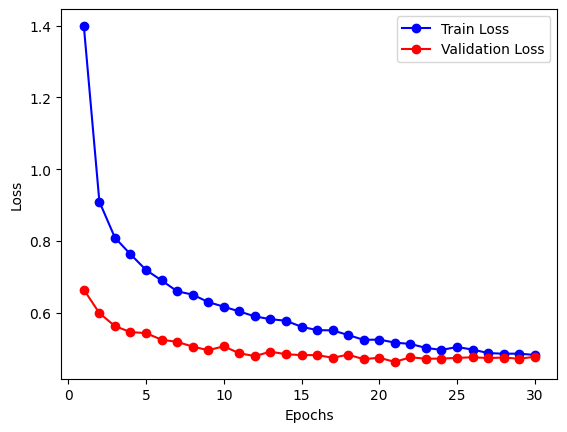

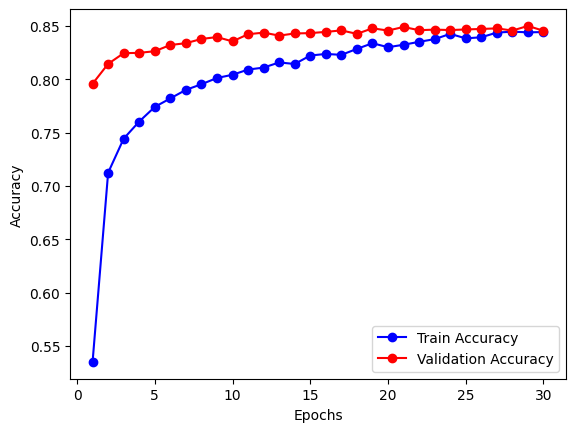

In [183]:
def plot_history(history):
  epochs = range(1, len(history.history['loss']) + 1)

  # loss
  plt.plot(epochs, history.history['loss'], 'bo-', label='Train Loss')
  plt.plot(epochs, history.history['val_loss'], 'ro-', label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  # accuracy
  plt.plot(epochs, history.history['accuracy'], 'bo-', label='Train Accuracy')
  plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

plot_history(history)

In [184]:
from tensorflow.keras.models import load_model

nn_model = load_model("nn_model.keras")
nn_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 256)                 │          77,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 359,648 (1.37 MB)

 Trainable params: 119,626 (467.29 KB)

 Non-trainable params: 768 (3.00 KB)

 Optimizer params: 239,254 (934.59 KB)

In [227]:
def classify_text(text, stopwords, doc2vec, model):
  text = preprocess(text, stopwords)
  vector = doc2vec.infer_vector(text.split())
  vector = np.array(vector).reshape(1, -1)

  pred = model.predict(vector)
  pred_idx = np.argmax(pred, axis=1)[0]

  labels = ['Chính trị xã hội', 'Đời sống', 'Khoa học', 'Kinh doanh', 'Pháp luật', 'Sức khoẻ', 'Thế giới', 'Thể thao', 'Văn hoá', 'Vi tính']
  pred_label = labels[pred_idx]
  print("Predicted class index:", pred_idx)
  print("Predicted class label:", pred_label)

In [244]:
text = """Tàu vũ trụ của SpaceX kết nối ISS
Tàu vũ trụ Crew Dragon của công ty hàng không vũ trụ SpaceX đã kết nối thành công với Trạm Vũ trụ quốc tế (ISS) vào rạng sáng 16/3 (theo giờ Mỹ), đưa 4 phi hành gia mới lên trạm trong sứ mệnh thay thế 2 phi hành gia của Cơ quan Hàng không và Vũ trụ Mỹ (NASA) bị mắc kẹt tại ISS trong suốt 9 tháng qua.
Sau khoảng 29 giờ kể từ khi phóng lúc 19h03 tối 15/3 theo giờ miền Đông Mỹ, từ Trung tâm Vũ trụ Kennedy thuộc bang Florida (Mỹ), tàu Crew Dragon với nhiệm vụ mang mã hiệu Crew-10 đã "cập bến" ISS lúc 0h04 sáng sớm 16/3 theo giờ miền Đông Mỹ, tức 11h04 giờ Việt Nam.

Phi hành đoàn gồm 2 phi hành gia NASA là Anne McClain và Nichole Ayers, nhà du hành vũ trụ Nhật Bản tên là Takuya Onishi và nhà du hành vũ trụ Nga Kirill Peskov. Hai nhà du hành Ayers và Peskov lần đầu tiên bay vào vũ trụ, trong khi hai phi hành gia McClain và Onishi đã từng tham gia nhiệm vụ trước đó. 4 phi hành gia này sẽ tiếp quản công việc tại ISS trong khoảng 6 tháng tới.
"""
classify_text(text, stopwords, doc2vec_model, nn_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted class index: 2
Predicted class label: Khoa học


In [251]:
from sklearn.metrics.pairwise import cosine_similarity

def compute_similarity(doc2vec_model, text1, text2):
    vec1 = doc2vec_model.infer_vector(text1.split())
    vec2 = doc2vec_model.infer_vector(text2.split())
    similarity = cosine_similarity([vec1], [vec2])[0][0]
    return similarity

text1 = 'Harry Kane là một chân sút rất hiệu quả'
text2 = 'Tottenham đã bán tiền đạo chủ lực Harry Kane cho Bayern'
compute_similarity(doc2vec_model, text1, text2)

0.004468426